In [4]:
# Étape 5 : Interprétation et Visualisation des Vulnérabilités

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


df = pd.read_csv("anssi_cve_data_reduced.csv")


# Nettoyage des données si nécessaire
df['Score CVSS'] = pd.to_numeric(df['Score CVSS'], errors='coerce')
df['Score EPSS'] = pd.to_numeric(df['Score EPSS'], errors='coerce')

In [21]:
print(df.columns)
df.head(10)


Index(['ID du bulletin', 'Titre du bulletin', 'Type de bulletin',
       'Date de publication', 'Lien du bulletin (ANSSI)', 'Identifiant CVE',
       'Score CVSS', 'Base Severity', 'Type CWE', 'Score EPSS', 'Description',
       'Éditeur/Vendor', 'Produit', 'Versions affectées'],
      dtype='object')


,ID du bulletin,Titre du bulletin,Type de bulletin,Date de publication,Lien du bulletin (ANSSI),Identifiant CVE,Score CVSS,Base Severity,Type CWE,Score EPSS,Description,Éditeur/Vendor,Produit,Versions affectées
0,CERTFR-2025-AVI-0392,Multiples vulnérabilités dans Mattermost Serve...,Avis,"Tue, 13 May 2025 00:00:00 +0000",https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,CVE-2025-4573,4.1,MEDIUM,CWE-90,0.00028,"Mattermost versions 10.7.x <= 10.7.1, 10.6.x <...",Mattermost,Mattermost,"10.7.0, 10.6.0, 10.5.0, 9.11.0"
1,CERTFR-2025-AVI-0392,Multiples vulnérabilités dans Mattermost Serve...,Avis,"Tue, 13 May 2025 00:00:00 +0000",https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,CVE-2025-4128,3.1,LOW,CWE-863,0.00023,"Mattermost versions 10.5.x <= 10.5.4, 9.11.x <...",Mattermost,Mattermost,"10.5.0, 9.11.0"
2,CERTFR-2025-AVI-0396,Multiples vulnérabilités dans les produits SAP...,Avis,"Tue, 13 May 2025 00:00:00 +0000",https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,CVE-2025-43005,4.3,MEDIUM,CWE-256,0.00019,SAP GUI for Windows allows an unauthenticated ...,SAP_SE,SAP GUI for Windows,BC-FES-GUI 8.00
3,CERTFR-2025-AVI-0396,Multiples vulnérabilités dans les produits SAP...,Avis,"Tue, 13 May 2025 00:00:00 +0000",https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,CVE-2025-31329,6.2,MEDIUM,CWE-141,0.00039,SAP NetWeaver is vulnerable to an Information ...,SAP_SE,SAP NetWeaver Application Server ABAP and ABAP...,"SAP_BASIS 700, SAP_BASIS 701, SAP_BASIS 702, S..."
4,CERTFR-2025-AVI-0396,Multiples vulnérabilités dans les produits SAP...,Avis,"Tue, 13 May 2025 00:00:00 +0000",https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,CVE-2025-42997,6.6,MEDIUM,CWE-732,0.00045,"Under certain conditions, SAP Gateway Client a...",SAP_SE,SAP Gateway Client,"SAP_GWFND 752, 753, 754, 755, 756, 757, 758"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,CERTFR-2025-AVI-0516,Multiples vulnérabilités dans Apache Tomcat (1...,Avis,"Tue, 17 Jun 2025 00:00:00 +0000",https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,CVE-2025-48976,NaN,Non disponible,Non disponible,0.00018,Allocation of resources for multipart headers ...,Apache Software Foundation,Apache Commons FileUpload,1.0
1222,CERTFR-2025-AVI-0516,Multiples vulnérabilités dans Apache Tomcat (1...,Avis,"Tue, 17 Jun 2025 00:00:00 +0000",https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,CVE-2025-48976,NaN,Non disponible,Non disponible,0.00018,Allocation of resources for multipart headers ...,Apache Software Foundation,Apache Commons FileUpload,2.0.0-M1
1223,CERTFR-2025-AVI-0516,Multiples vulnérabilités dans Apache Tomcat (1...,Avis,"Tue, 17 Jun 2025 00:00:00 +0000",https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,CVE-2025-48988,NaN,Non disponible,CWE-770,0.00018,Allocation of Resources Without Limits or Thro...,Apache Software Foundation,Apache Tomcat,"11.0.0-M1, 10.1.0-M1, 9.0.0.M1"
1224,CERTFR-2025-AVI-0516,Multiples vulnérabilités dans Apache Tomcat (1...,Avis,"Tue, 17 Jun 2025 00:00:00 +0000",https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,CVE-2025-49125,NaN,Non disponible,CWE-288,0.00013,Authentication Bypass Using an Alternate Path ...,Apache Software Foundation,Apache Tomcat,"11.0.0-M1, 10.1.0-M1, 9.0.0.M1"


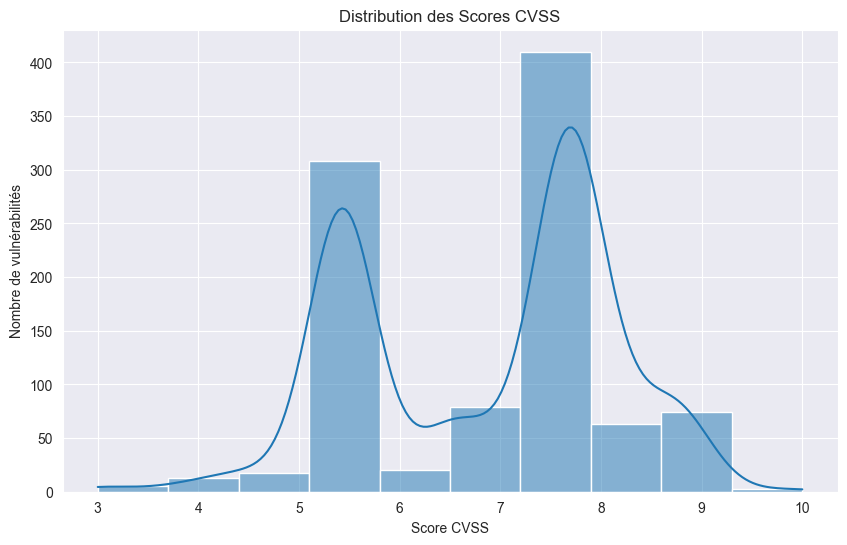

In [7]:
#Histogramme des scores CVSS
plt.figure(figsize=(10,6))
sns.histplot(df['Score CVSS'].dropna(), bins=10, kde=True)
plt.title("Distribution des Scores CVSS")
plt.xlabel("Score CVSS")
plt.ylabel("Nombre de vulnérabilités")
plt.grid(True)
plt.show()

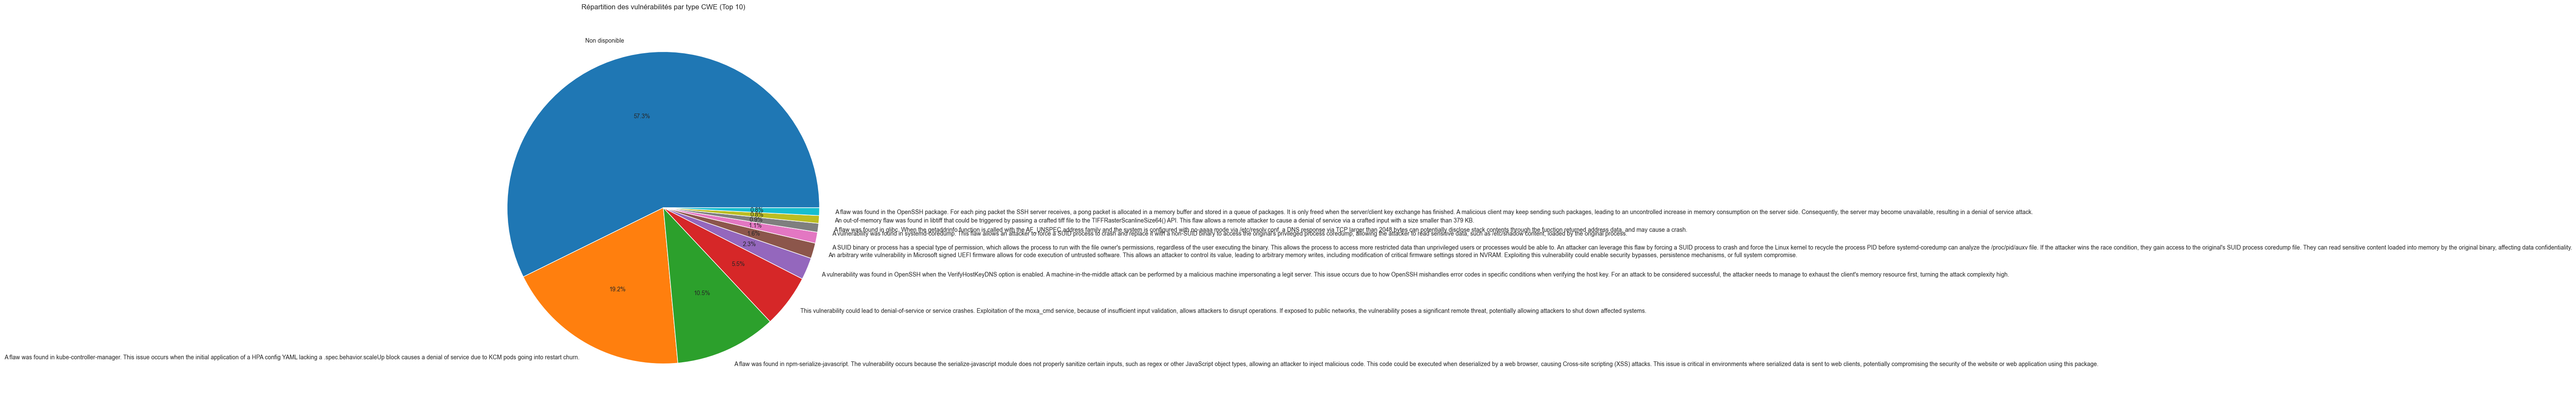

In [8]:
#Diagramme circulaire des types de vulnérabilités (CWE)
top_cwe = df['Description'].value_counts().head(10)
fig, ax = plt.subplots(figsize=(12, 12))
top_cwe.plot.pie(autopct='%1.1f%%', ax=ax)
ax.set_title("Répartition des vulnérabilités par type CWE (Top 10)")
ax.set_ylabel("")  # Pour ne pas afficher "Description"
plt.show()


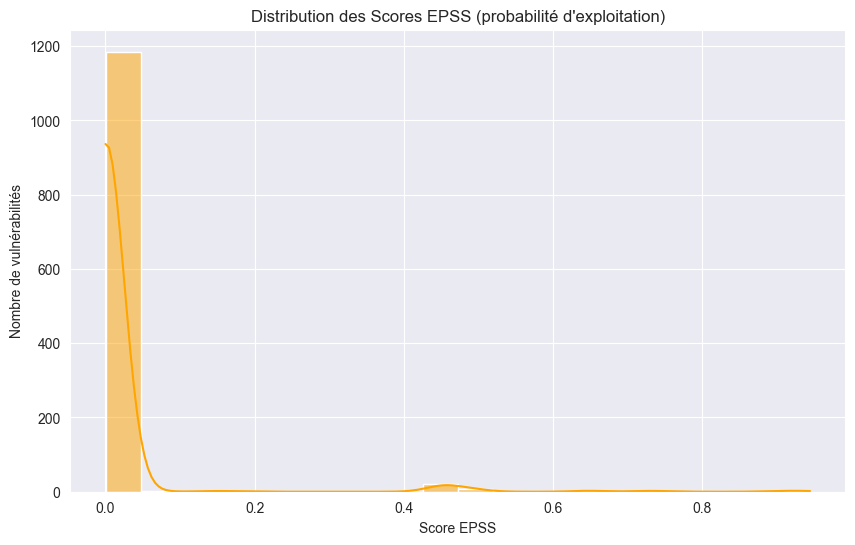

In [9]:
#Courbe des scores EPSS
plt.figure(figsize=(10,6))
sns.histplot(df['Score EPSS'].dropna(), bins=20, kde=True, color='orange')
plt.title("Distribution des Scores EPSS (probabilité d'exploitation)")
plt.xlabel("Score EPSS")
plt.ylabel("Nombre de vulnérabilités")
plt.grid(True)
plt.show()


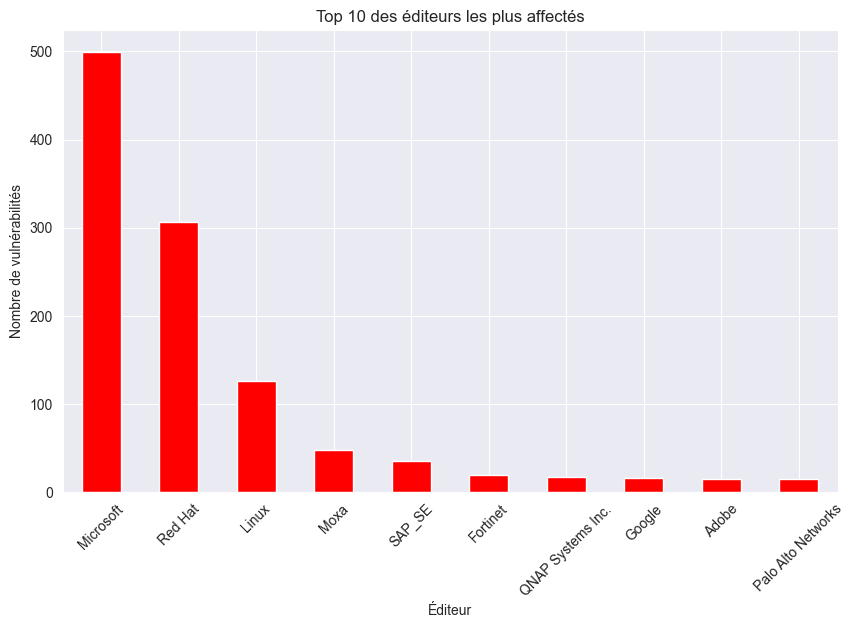

In [10]:
#Classement des éditeurs les plus affectés
top_vendors = df['Éditeur/Vendor'].explode().value_counts().head(10)
top_vendors.plot(kind='bar', figsize=(10,6), color='red')
plt.title("Top 10 des éditeurs les plus affectés")
plt.xlabel("Éditeur")
plt.ylabel("Nombre de vulnérabilités")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


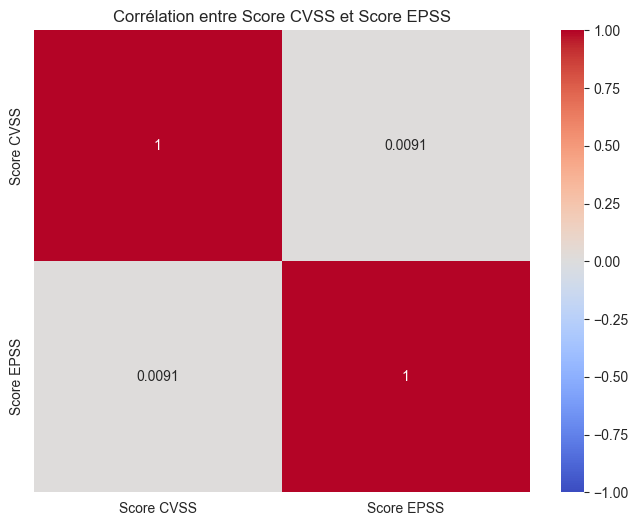

In [11]:
#Heatmap des corrélations (CVSS vs EPSS
plt.figure(figsize=(8,6))
corr = df[['Score CVSS', 'Score EPSS']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Corrélation entre Score CVSS et Score EPSS")
plt.show()


In [12]:
#Nuage de points CVSS vs EPSS
fig = px.scatter(df, x='Score CVSS', y='Score EPSS',
                 hover_data=['Identifiant CVE', 'Éditeur/Vendor', 'Produit'],
                 title="Nuage de points : Score CVSS vs Score EPSS",
                 labels={"Score CVSS": "Gravité (CVSS)", "Score EPSS": "Probabilité (EPSS)"})
fig.show()


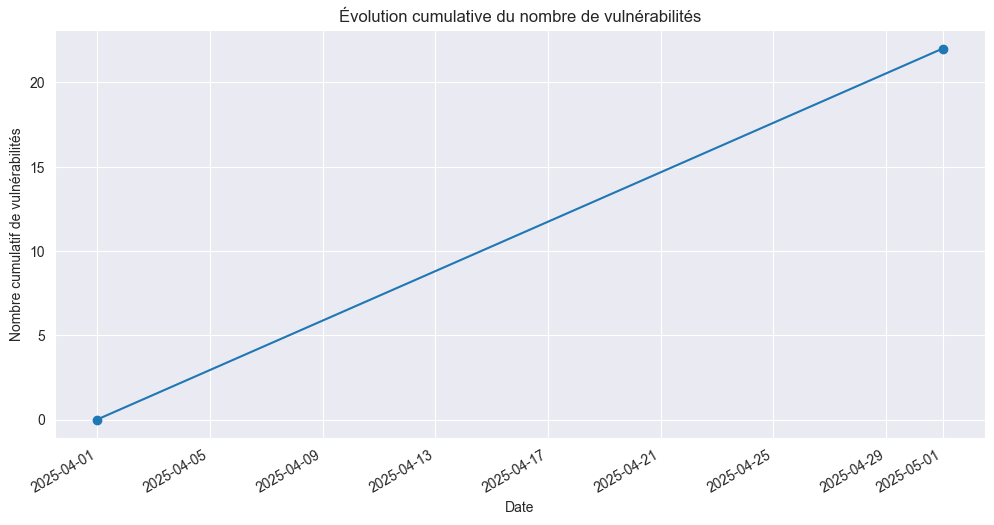

In [13]:
# Courbe cumulative des vulnérabilités en fonction du temps
df['Date de publication'] = pd.to_datetime(df['Date de publication'], errors='coerce').dt.tz_localize(None)
df_valid = df.dropna(subset=['Date de publication'])

# Groupe par mois
cumulative_df = df_valid.groupby(df_valid['Date de publication'].dt.to_period('M')).size().cumsum()

# Ajout d'un point initial à 0 si seulement un mois
if len(cumulative_df) == 1:
    first_month = cumulative_df.index[0] - 1  # Mois précédent
    cumulative_df.loc[first_month] = 0
    cumulative_df = cumulative_df.sort_index()

# Convertir pour affichage
cumulative_df.index = cumulative_df.index.to_timestamp()

# Plot
cumulative_df.plot(figsize=(12, 6), marker='o')
plt.title("Évolution cumulative du nombre de vulnérabilités")
plt.xlabel("Date")
plt.ylabel("Nombre cumulatif de vulnérabilités")
plt.grid(True)
plt.show()



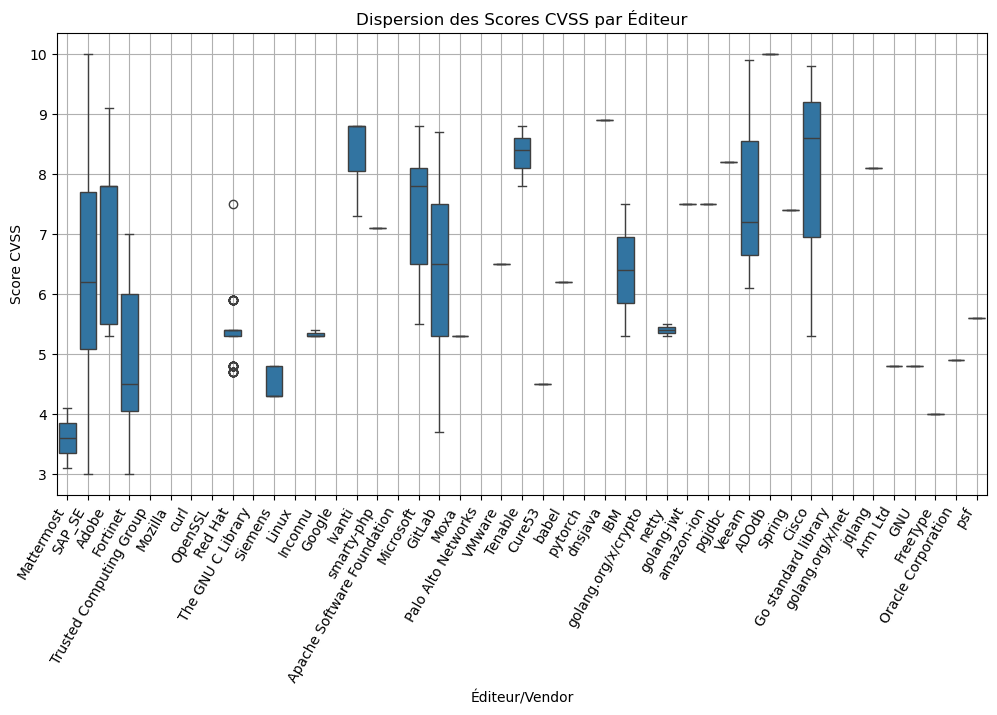

In [5]:
#Boxplot des scores CVSS par éditeur
df_exploded = df.explode('Éditeur/Vendor')
plt.figure(figsize=(12,6))
sns.boxplot(data=df_exploded, x='Éditeur/Vendor', y='Score CVSS')
plt.title("Dispersion des Scores CVSS par Éditeur")
plt.xticks(rotation=60, ha='right')
plt.grid(True)
plt.show()


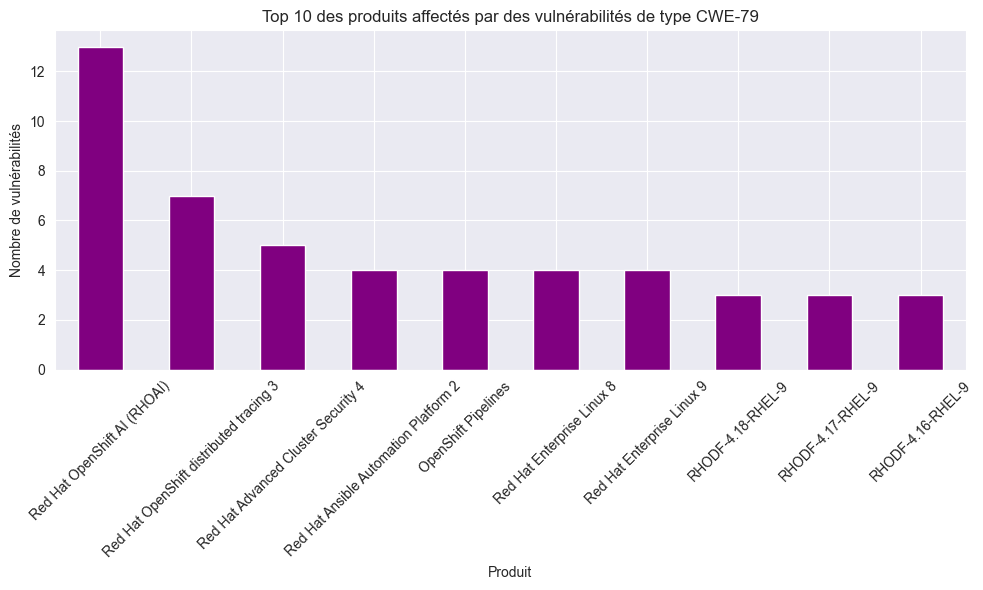

In [15]:
cwe_type = "CWE-79"
cwe_filtré = df[df['Type CWE'].str.contains(cwe_type, na=False, case=False)]

if cwe_filtré.empty:
    print(f"Aucune vulnérabilité trouvée pour le type CWE {cwe_type}")
else:
    top_produits_cwe = cwe_filtré['Produit'].explode().value_counts().head(10)
    top_produits_cwe.plot(kind='bar', color='purple', figsize=(10,6))
    plt.title(f"Top 10 des produits affectés par des vulnérabilités de type {cwe_type}")
    plt.xlabel("Produit")
    plt.ylabel("Nombre de vulnérabilités")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()



Nombre de vulnérabilités publiées le 13 mai 2025 : 22


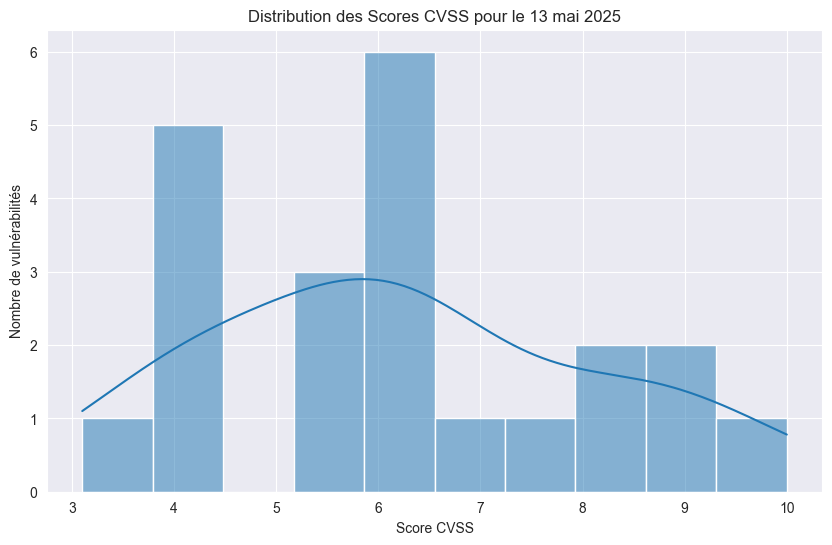

In [16]:
# Nombre de vulnérabilités publiées le 13 mai 2025
count_13_mai = df[df['Date de publication'] == pd.Timestamp('2025-05-13')].shape[0]
print(f"Nombre de vulnérabilités publiées le 13 mai 2025 : {count_13_mai}")

# Histogramme des scores CVSS ce jour-là
import matplotlib.pyplot as plt
import seaborn as sns

subset = df[df['Date de publication'] == pd.Timestamp('2025-05-13')]

plt.figure(figsize=(10,6))
sns.histplot(subset['Score CVSS'].dropna(), bins=10, kde=True)
plt.title("Distribution des Scores CVSS pour le 13 mai 2025")
plt.xlabel("Score CVSS")
plt.ylabel("Nombre de vulnérabilités")
plt.show()



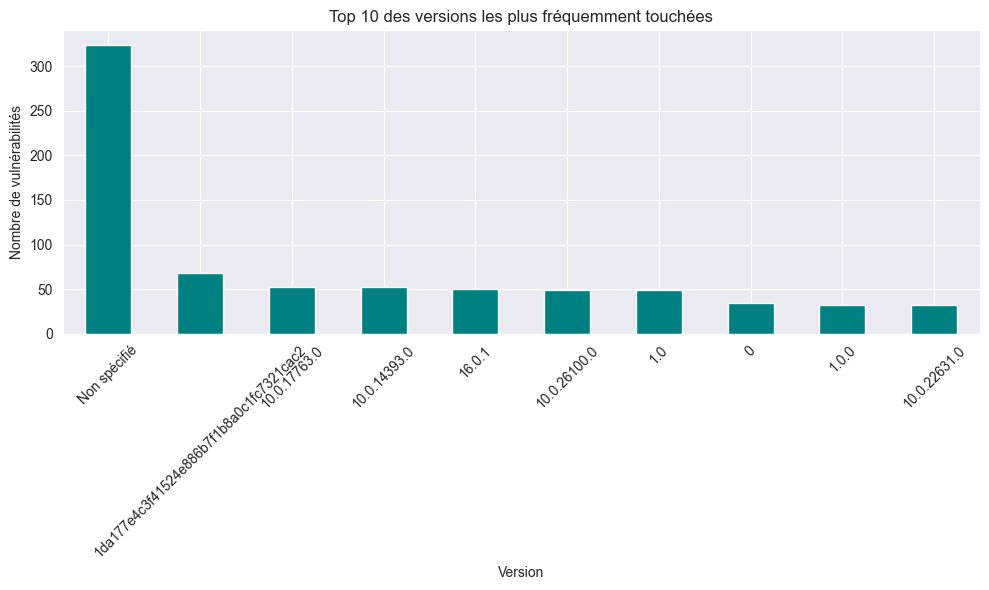

In [17]:
# On considère que les versions sont séparées par des virgules dans 'Versions affectées'
df['Versions affectées'] = df['Versions affectées'].astype(str).str.split(',')

versions = df['Versions affectées'].explode().str.strip()
top_versions = versions.value_counts().head(10)

top_versions.plot(kind='bar', color='teal', figsize=(10,6))
plt.title("Top 10 des versions les plus fréquemment touchées")
plt.xlabel("Version")
plt.ylabel("Nombre de vulnérabilités")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


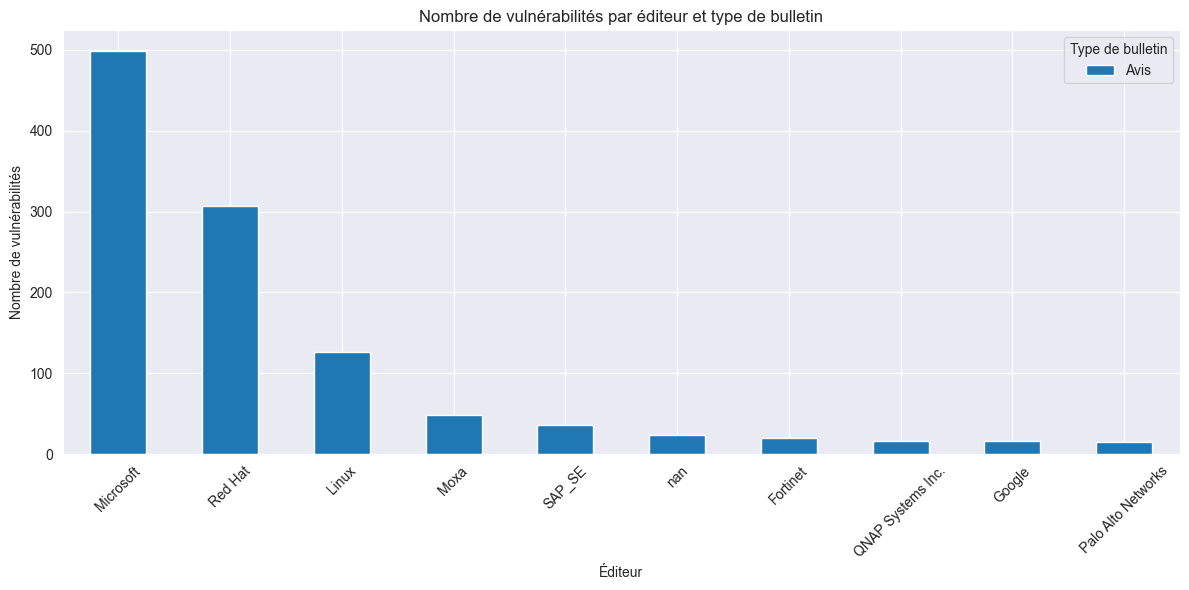

In [18]:
df['Type de bulletin'] = df['Type de bulletin'].astype(str).str.strip()
df['Éditeur/Vendor'] = df['Éditeur/Vendor'].astype(str).str.split(',')

df_exploded = df.explode('Éditeur/Vendor')
df_exploded['Éditeur/Vendor'] = df_exploded['Éditeur/Vendor'].str.strip()

grouped = df_exploded.groupby(['Éditeur/Vendor', 'Type de bulletin']).size().unstack(fill_value=0)

top_10 = grouped.sum(axis=1).sort_values(ascending=False).head(10)
grouped_top = grouped.loc[top_10.index]

grouped_top.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.title("Nombre de vulnérabilités par éditeur et type de bulletin")
plt.xlabel("Éditeur")
plt.ylabel("Nombre de vulnérabilités")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Dans cette section, nous utilisons le Machine Learning pour analyser, classer et regrouper automatiquement les vulnérabilités extraites des bulletins ANSSI.

### Partie 1 : Modèle supervisé – Prédiction de la gravité

Nous avons entraîné un modèle de classification supervisée (`LogisticRegression`) pour prédire le niveau de gravité d’une vulnérabilité (`Base Severity`) à partir des caractéristiques suivantes :

- Score CVSS (gravité théorique),
- Score EPSS (probabilité d’exploitation),
- Type CWE (type de faille),
- Éditeur du logiciel concerné.

Le modèle a été entraîné sur un jeu de données équilibré en utilisant `class_weight="balanced"` pour compenser le déséquilibre entre classes. Il permet d’anticiper la criticité d’une CVE même en l’absence de classification manuelle.




In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, silhouette_score


df_clf = df.dropna(subset=["Score CVSS", "Score EPSS", "Base Severity",
                           "Type CWE", "Éditeur/Vendor"]).copy()
df_clf = df_clf[df_clf["Base Severity"] != "Non disponible"]

num_cols = ["Score CVSS", "Score EPSS"]
cat_cols = ["Type CWE", "Éditeur/Vendor"]

X = df_clf[num_cols + cat_cols]
y = df_clf["Base Severity"]       

# Pré‑prosessing
preproc = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

# Modèle : régression logistique multiclasse
clf = Pipeline([
    ("prep", preproc),
    ("logreg", LogisticRegression(max_iter=1000, class_weight="balanced"))
])


X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

clf.fit(X_train, y_train)
print("\n--- Rapport de classification sur 'Base Severity' ---")
print(classification_report(y_test, clf.predict(X_test), zero_division=0))





--- Rapport de classification sur 'Base Severity' ---
              precision    recall  f1-score   support

    CRITICAL       0.00      0.00      0.00         1
        HIGH       0.99      0.97      0.98       110
         LOW       0.33      1.00      0.50         2
      MEDIUM       0.99      0.95      0.97        85

    accuracy                           0.96       198
   macro avg       0.58      0.73      0.61       198
weighted avg       0.98      0.96      0.97       198



### Partie 2 : Modèle non supervisé – Clustering des vulnérabilités

Nous avons ensuite appliqué un algorithme de clustering (`KMeans`) sur les variables numériques (CVSS, EPSS) pour regrouper automatiquement les vulnérabilités selon leur profil de risque. Chaque CVE a été assignée à un cluster, évalué à l’aide du **score silhouette**.

Cela permet de :
- Repérer des familles de vulnérabilités similaires,
- Prioriser les CVE à haut risque,
- Mieux visualiser la répartition des menaces.

In [28]:
#Clustering K‑Means 
df_cluster = df.dropna(subset=["Score CVSS", "Score EPSS"]).copy()
X_unsup = df_cluster[["Score CVSS", "Score EPSS"]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_unsup)

kmeans = KMeans(n_clusters=4, random_state=0)
labels = kmeans.fit_predict(X_scaled)

df_cluster["Cluster"] = labels
print("\n--- Score silhouette global ---")
print(silhouette_score(X_scaled, labels).round(3))

print("\n--- Répartition des clusters ---")
print(df_cluster["Cluster"].value_counts())

# (optionnel) Sauvegarde des données enrichies
df_cluster.to_csv("anssi_cve_clusters.csv", index=False)


--- Score silhouette global ---
0.718

--- Répartition des clusters ---
Cluster
3    468
1    355
0    137
2     32
Name: count, dtype: int64
